**The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.**

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error,r2_score

Reading the file

In [2]:
data=pd.read_csv('car_age_price.csv')
data_copy=data
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


Checking details of data

In [3]:
data.describe().round(2)

,Year,Price
count,112.00,112.00
mean,2016.67,483866.04
std,1.63,91217.45
min,2013.00,300000.00
25%,2015.00,423750.00
50%,2017.00,500000.00
75%,2017.00,550000.00
max,2020.00,755000.00


Starting year is 2013 and ending year is 2020. The price starts from 3,00,000 and goes upto 7,55,000.

Checking data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


Both the parameters are of numerical type. The columns are Year and Price

Checking missing values

In [5]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

There are no missing value in the data set

Checking for duplicate values

In [6]:
data.duplicated().count()

112

There are 112 duplicate value. But as it's car sale for a particular year there is chance of having the same price hence the reason for duplication. So this can be ignored.

Checking correlation between the parameters

           Year     Price
Year   1.000000  0.776302
Price  0.776302  1.000000


<AxesSubplot:>

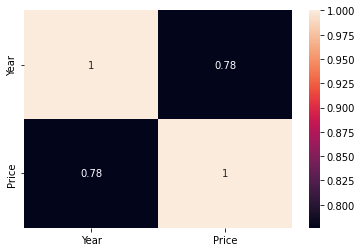

In [7]:
print(data.corr())
sns.heatmap(data.corr(),annot=True)

The correlation between Price and Year is 0.78. ie high correlation is there.

Checking the distribution

(array([12.,  8., 12., 13., 32., 23.,  7.,  2.,  2.,  1.]),
 array([300000., 345500., 391000., 436500., 482000., 527500., 573000.,
        618500., 664000., 709500., 755000.]),
 <BarContainer object of 10 artists>)

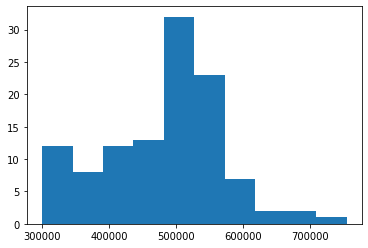

In [8]:
plt.hist(data['Price'])

Normal distribution

Scatter plot diagram to check the general trend in data

<AxesSubplot:xlabel='Year', ylabel='Price'>

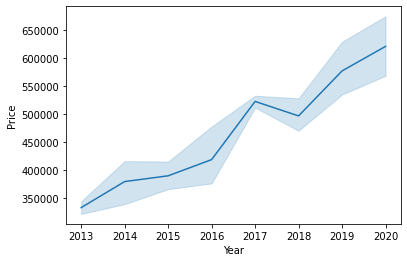

In [9]:
sns.lineplot(data=data,x='Year',y='Price')

The price of the car increases as year is increasing. ie latest model of the car is having more resale value.

Checking for outliers in Price

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


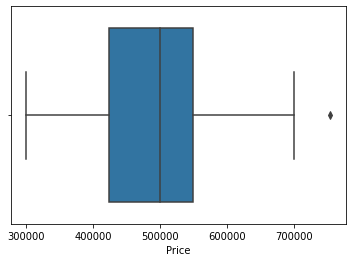

In [10]:
sns.boxplot(data['Price'])
plt.show()

Outliers are there. So the same needs to be replaced by mean

Finding IQR in price

In [11]:
from sklearn.utils import DataConversionWarning
IQR=stats.iqr(data['Price'])
Q1=data['Price'].quantile(0.25)
Q3=data['Price'].quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR


Finding outliers < minimum

In [12]:
data.loc[data.Price<min_limit]

,Year,Price


Finding outliers > Maximum

In [13]:
data.loc[data.Price>max_limit]

,Year,Price
1,2019,755000


Replacing the outlier with mean of 'Price'

In [14]:
data.loc[data['Price']>max_limit,'Price']=np.mean(data.Price)

Checking for outliers in Year

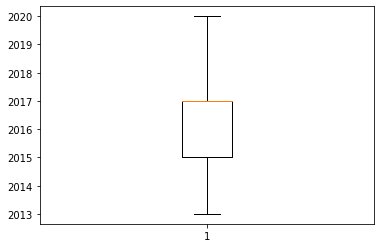

In [15]:
plt.boxplot(data['Year'])
plt.show()

No outliers

Creating the linear model and prediction

In [16]:
x=data.drop(['Price'],axis=1)
y=data.drop(['Year'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state= 42 , test_size = 0.2)
lr = LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

Finding the MSE and R^2 value for the model generated and the test values for linear regression

In [17]:
print( ' Mean square error = ',mean_squared_error(y_test,predictions).round(3))
print(' R squared value = ', r2_score(y_test,predictions).round(3))

 Mean square error =  3856389421.844
 R squared value =  0.436


Predicting the price for 2022 using linear regression model

In [18]:
y_pred = lr.predict([[2022]]).round(2)
print('The value of car in year 2022 = ',y_pred)

The value of car in year 2022 =  [[723904.33]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Lasso model

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 3500)
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y, random_state= 42 , test_size = 0.2)
lasso.fit(x_train1,y_train1)
predictions1 = lasso.predict(x_test1)
train_score_ls =lasso.score(x_train1,y_train1).round(3)
test_score_ls =lasso.score(x_test1,y_test1).round(3)

print("The train score for lasso model is {}".format(train_score_ls))
print("The test score for lasso model is {}".format(test_score_ls))
y_pred1=lasso.predict([[2022]]).round(2)
print('The value of the car in 2022 will be : ',y_pred1)

The train score for lasso model is 0.618
The test score for lasso model is 0.454
The value of the car in 2022 will be :  [716058.47]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


The value predicted by the linear regression model Rs. 7,23,904 and by the Lasso model is Rs. 7,16,058.47. The value predicted by Lasso model is less than linear regression

Finding the MSE and R^2 value for the model generated and the test values for Lasso regression

In [20]:
print( ' Mean square error = ',mean_squared_error(y_test1,predictions1).round(3))
print(' R squared value = ', r2_score(y_test1,predictions1).round(3))

 Mean square error =  3736353272.137
 R squared value =  0.454


The MSE for lasso is less than linear regression model. So Lasso model is better here.

Plotting the linear regression model

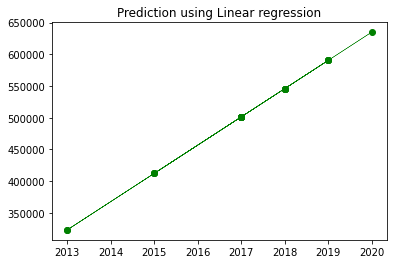

In [21]:
plt.plot(x_test, predictions, color = 'green', marker = 'o', linewidth = 0.4, label = 'Predicted Prices')
plt.title('Prediction using Linear regression')
plt.show()

Plotting the Lasso model

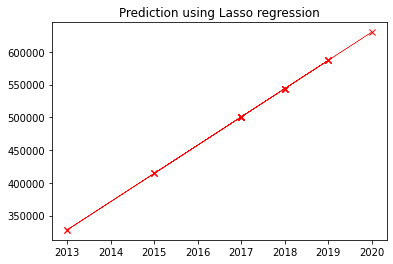

In [22]:
plt.plot(x_test1, predictions1, color = 'red', marker = 'x', linewidth = 0.4, label = 'Predicted Prices')
plt.title('Prediction using Lasso regression')
plt.show()